# IC Regression with Weather Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

print('Pandas version :', pd.__version__)
print('Numpy version  :', np.__version__)
print('Matplot version:', matplotlib.__version__);
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sk.__version__)

print('--------------')
print(pd.Timestamp.now())

Pandas version : 2.2.2
Numpy version  : 1.26.4
Matplot version: 3.9.2
Seaborn version: 0.13.2
Sklearn version: 1.5.1
--------------
2025-02-05 10:05:58.254023


In [3]:
def whatis(d):
    print("Type : ", type(d))
    print("Shape: ", d.shape)

In [48]:
df = pd.read_csv('../Data/WeatherDataP_outlier.csv')
df.head()

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pressure (millibars)  25 non-null     float64
 1   Humidity              25 non-null     float64
dtypes: float64(2)
memory usage: 532.0 bytes


In [52]:
df.describe()

,Pressure (millibars),Humidity
count,25.000000,25.000000
mean,1011.481600,0.609200
std,2.873799,0.158874
min,1007.260000,0.360000
25%,1008.360000,0.500000
50%,1012.220000,0.600000
75%,1014.240000,0.780000
max,1014.520000,0.850000


In [54]:
df.columns

Index(['Pressure (millibars)', 'Humidity'], dtype='object')

In [56]:
df.columns = ['press', 'humid']
df.columns

Index(['press', 'humid'], dtype='object')

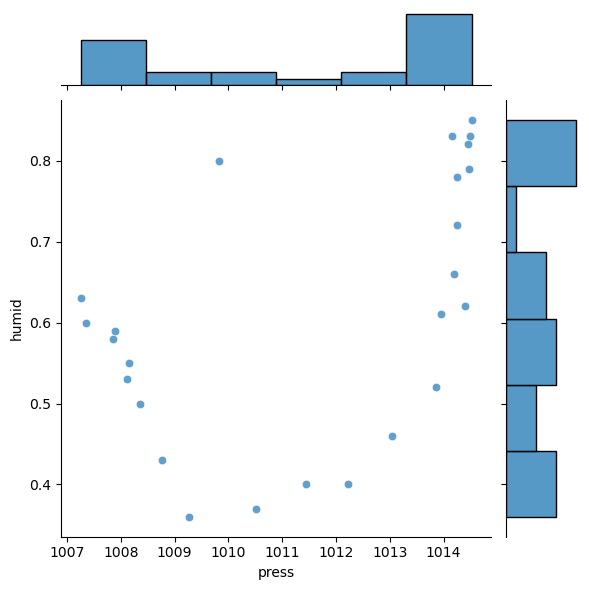

In [58]:
sns.jointplot(x='press', y='humid', data=df, alpha=0.7)

<Axes: xlabel='press', ylabel='humid'>

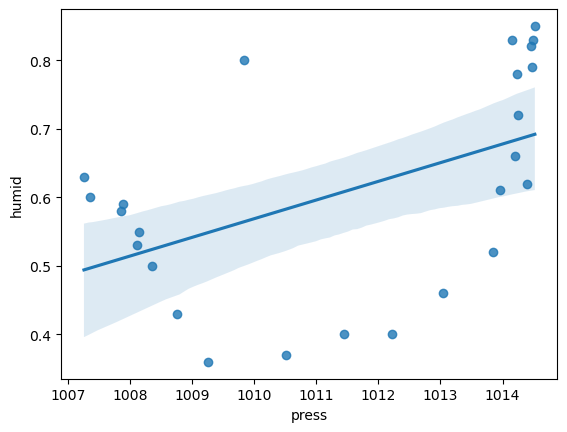

In [60]:
sns.regplot(x='press', y='humid', data=df)

In [62]:
X=pd.DataFrame(df.press)
X.head()

,press
0,1014.40
1,1014.20
2,1014.47
3,1014.45
4,1014.49


In [64]:
y=df.humid
y.head(), X.shape, y.shape

(0    0.62
 1    0.66
 2    0.79
 3    0.82
 4    0.83
 Name: humid, dtype: float64,
 (25, 1),
 (25,))

# Quick Simple Linear Regression - not splitting the small dataset

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [68]:
print(lm.intercept_)
print(lm.coef_)

-26.946159768377395
[0.02724257]


In [70]:
y_preds = lm.predict(X)
y_preds

array([0.68870472, 0.68325621, 0.6906117 , 0.69006685, 0.69115655,
       0.69197383, 0.6821665 , 0.68434591, 0.68461833, 0.67671799,
       0.67372131, 0.65165482, 0.62931591, 0.60806671, 0.58300354,
       0.56420617, 0.5486779 , 0.53505662, 0.52415959, 0.51734895,
       0.51843865, 0.51026588, 0.51135558, 0.49691702, 0.49419276])

In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# variance of the target explained by the independent variables.
# how well the model fits the data. Higher is better.
r2 = r2_score(y, y_preds) 

# Average squared distance between predicted and actual values
# Lower is better  (outliers will exegarate this)
mse = mean_squared_error(y, y_preds)

# Average absolute distance between predicted and actual values
# Lower is better
mae = mean_absolute_error(y, y_preds)

# Starting point of the regression line on the y-axis.
# value of target when independent variables are at zero
intercept = lm.intercept_

print('R2   : %14.3f' %r2)  # same as linreg.score() 
print('MAE  : %14.3f' %mae)
print('MSE  : %14.3f' %mse)
print('RMSE : %14.3f' %math.sqrt(mse))
print('Int  : %14.3f' %intercept)
print('Coef : %14.3f' %lm.coef_[0])
print('Score: %14.3f' %lm.score(X, y))

R2   :          0.243
MAE  :          0.118
MSE  :          0.018
RMSE :          0.135
Int  :        -26.946
Coef :          0.027
Score:          0.243


# Preprocessing

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [76]:
1014*1014

1028196

In [78]:
pre_process = PolynomialFeatures(degree=2) #, include_bias=False)
X_poly = pre_process.fit_transform(X)
X_poly

array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
       [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
       [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
       [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
       [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
       [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
       [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
       [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
       [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
       [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
       [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
       [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
       [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
       [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
       [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
       [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
       [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
       [1.00000000e+00, 1.00876

## Alternatively - to get Poly Feature terms, split into fit and transform

In [80]:
pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit(X)
poly_feature_names = X_poly.get_feature_names_out(X.columns)
X_poly = pre_process.transform(X)
X_poly, poly_feature_names

(array([[1.00000000e+00, 1.01440000e+03, 1.02900736e+06],
        [1.00000000e+00, 1.01420000e+03, 1.02860164e+06],
        [1.00000000e+00, 1.01447000e+03, 1.02914938e+06],
        [1.00000000e+00, 1.01445000e+03, 1.02910880e+06],
        [1.00000000e+00, 1.01449000e+03, 1.02918996e+06],
        [1.00000000e+00, 1.01452000e+03, 1.02925083e+06],
        [1.00000000e+00, 1.01416000e+03, 1.02852051e+06],
        [1.00000000e+00, 1.01424000e+03, 1.02868278e+06],
        [1.00000000e+00, 1.01425000e+03, 1.02870306e+06],
        [1.00000000e+00, 1.01396000e+03, 1.02811488e+06],
        [1.00000000e+00, 1.01385000e+03, 1.02789182e+06],
        [1.00000000e+00, 1.01304000e+03, 1.02625004e+06],
        [1.00000000e+00, 1.01222000e+03, 1.02458933e+06],
        [1.00000000e+00, 1.01144000e+03, 1.02301087e+06],
        [1.00000000e+00, 1.01052000e+03, 1.02115067e+06],
        [1.00000000e+00, 1.00983000e+03, 1.01975663e+06],
        [1.00000000e+00, 1.00926000e+03, 1.01860575e+06],
        [1.000

In [82]:
X.shape, X_poly.shape 

((25, 1), (25, 3))

In [84]:
whatis(X_poly)

Type :  <class 'numpy.ndarray'>
Shape:  (25, 3)
